In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
hpc_path = f'results/hpc_benchmark_2_16_1_daint_strict_thread_*.csv'

hpc_split_path = f'results/hpc_benchmark_2_16_1_daint_strict_split_thread_*.csv'
hpc_split_new_path = f'results/hpc_benchmark_2_16_1_daint_strict_split_new_thread_*.csv'

hpc_one_path = f'results/hpc_benchmark_2_16_1_daint_strict_one_thread_*.csv'
hpc_all_path = f'results/hpc_benchmark_2_16_1_daint_strict_all_thread_*.csv'
hpc_in_path = f'results/hpc_benchmark_2_16_1_daint_strict_in_thread_*.csv'
hpc_out_path = f'results/hpc_benchmark_2_16_1_daint_strict_out_thread_*.csv'
hpc_tot_path = f'results/hpc_benchmark_2_16_1_daint_strict_tot_thread_*.csv'
hpc_bern_path = f'results/hpc_benchmark_2_16_1_daint_strict_bern_thread_*.csv'
hpc_bern_sym_path = f'results/hpc_benchmark_2_16_1_daint_strict_bern-sym_thread_*.csv'

mam_path = f'results/multi-area-model_2_16_1_daint_strict_thread_*.csv'

mesocircuit_path = f'results/4x4_mesocircuit_2_16_1_daint_strict_thread_*.csv'

# HPC benchmark

In [3]:
hpc_res = pd.concat([pd.read_csv(bench)
                     for bench in glob.glob(hpc_path)])

In [4]:
print(hpc_res)

   NUMBER_OF_NODES  TASKS_PER_NODE  THREADS_PER_TASK  NUM_VPS  SCALE  PLASTIC  \
0                1               3                 8       24     20     True   
1                2               3                 8       48     40     True   
2                4               3                 8       96     80     True   
3                8               3                 8      192    160     True   
4               16               3                 8      384    320     True   
0                1               6                 4       24     20     True   
1                2               6                 4       48     40     True   
2                4               6                 4       96     80     True   
3                8               6                 4      192    160     True   
4               16               6                 4      384    320     True   
0                1               2                12       24     20     True   
1                2          

In [5]:
hpc_res['T_bld_xn'] = hpc_res['T_conns_min'] + hpc_res['T_ini_max']
hpc_res['T_bld_nx'] = hpc_res['T_conns_max'] + hpc_res['T_ini_min']

hpc_res['T_bld'] = hpc_res[['T_bld_xn', 'T_bld_nx']].min(axis=1)

In [6]:
hpc_pres = pd.pivot_table(hpc_res, index=['SCALE','THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                      values=['T_bld', 'VSize_sum'])

In [7]:
hpc_pres

T_bld   VSize_sum
SCALE THREADS_PER_TASK NUMBER_OF_NODES                    
20    1                1                 70.52   108664800
      4                1                155.38   104721696
      8                1                195.27   103768224
      12               1                233.38   101868648
40    1                2                 72.24   254238928
      4                2                150.26   211971568
      8                2                196.37   207634176
      12               2                234.33   203051508
80    1                4                 75.03   508691560
      4                4                151.66   433026952
      8                4                204.54   416155432
      12               4                233.60   406860456
160   1                8                 77.84  1045363096
      4                8                162.71   905932184
      8                8                217.33   852823288
      12               8                256.86   838010712
320   1                16                81.83  2097372280
      4                16               174.03  1909198328
      8                16               238.31  1888055032
      12               16               295.41  1882060152

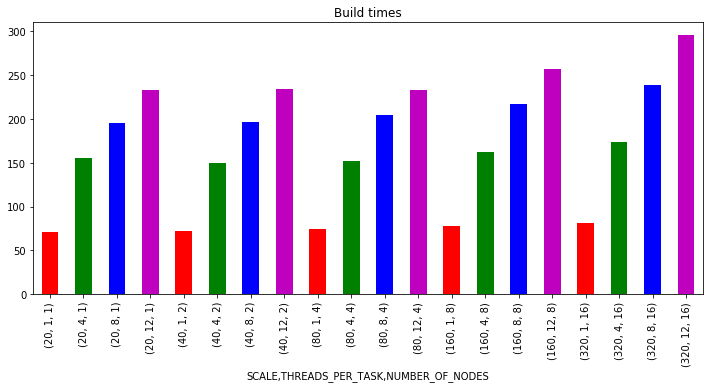

In [9]:
hpc_pres['T_bld'].plot(kind='bar', title='Build times',
                       color = ['r', 'g', 'b', 'm']*int(len(hpc_pres)/4), figsize=(12,5))

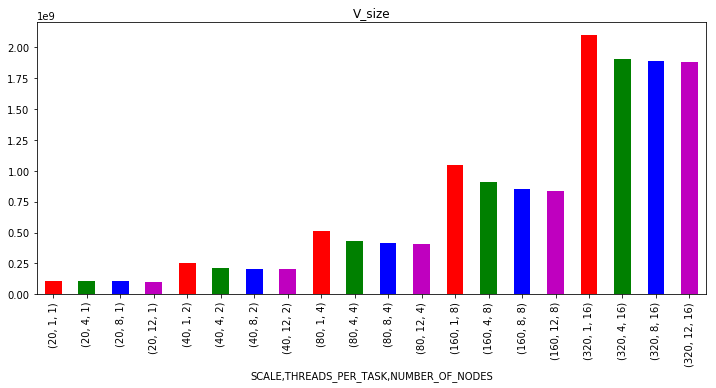

In [10]:
hpc_pres['VSize_sum'].plot(kind='bar', title='V_size',
                           color = ['r', 'g', 'b', 'm']*int(len(hpc_pres)/4), figsize=(12,5))

# HPC Benchmark - split into many `Connect` calls

In [11]:
hpc_split_res = pd.concat([pd.read_csv(bench)
                           for bench in glob.glob(hpc_split_path)])

In [12]:
print(hpc_split_res)

   NUMBER_OF_NODES  TASKS_PER_NODE  THREADS_PER_TASK  SCALE  PLASTIC  NBLOCKS  \
0                1               3                 8     20     True     1000   
1                2               3                 8     40     True     1000   
2                4               3                 8     80     True     1000   
3                8               3                 8    160     True     1000   
4               16               3                 8    320     True     1000   
0                1               6                 4     20     True     1000   
1                2               6                 4     40     True     1000   
2                4               6                 4     80     True     1000   
3                8               6                 4    160     True     1000   
4               16               6                 4    320     True     1000   
0                1               2                12     20     True     1000   
1                2          

In [13]:
hpc_split_res['T_bld'] = hpc_split_res['EE_inner_conn_time'] + hpc_split_res['EI_inner_conn_time'] + hpc_split_res['IE_inner_conn_time'] + hpc_split_res['II_inner_conn_time']

In [14]:
hpc_split_pres = pd.pivot_table(hpc_split_res, index=['SCALE','THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                                values=['T_bld', 'VSize_sum', 'N_conns_sum', 'EE_conns_per_sec'])

In [15]:
hpc_split_pres

EE_conns_per_sec  N_conns_sum  T_bld  \
SCALE THREADS_PER_TASK NUMBER_OF_NODES                                         
20    1                1                       2173210.0   2520225000  127.0   
      4                1                       4079170.0   2520225000  291.0   
      8                1                       6694770.0   2520225000  271.0   
      12               1                       9662410.0   2520225000  218.0   
40    1                2                       2143540.0   5040450000  204.0   
      4                2                       4025640.0   5040450000  132.0   
      8                2                       7045930.0   5040450000  124.0   
      12               2                       9073600.0   5040450000  216.0   
80    1                4                       2099530.0  10080900000   65.0   
      4                4                       4079170.0  10080900000  161.0   
      8                4                       6728130.0  10080900000  223.0   
      12               4                       9210830.0  10080900000  201.0   
160   1                8                       2014930.0  20161800000  133.0   
      4                8                       4063210.0  20161800000  259.0   
      8                8                       6438540.0  20161800000  293.0   
      12               8                       8837010.0  20161800000  158.0   
320   1                16                      1874480.0  40323600000   79.0   
      4                16                      3581850.0  40323600000  172.0   
      8                16                      6040270.0  40323600000  101.0   
      12               16                      8458650.0  40323600000  289.0   

                                         VSize_sum  
SCALE THREADS_PER_TASK NUMBER_OF_NODES              
20    1                1                 108664800  
      4                1                 104721696  
      8                1                 103817380  
      12               1                 106798676  
40    1                2                 254238928  
      4                2                 217630192  
      8                2                 207664892  
      12               2                 203850224  
80    1                4                 508691560  
      4                4                 433315720  
      8                4                 413882160  
      12               4                 410073768  
160   1                8                1045363384  
      4                8                 895655320  
      8                8                 846513400  
      12               8                 829445976  
320   1                16               2096415352  
      4                16               1912147448  
      8                16               1858072312  
      12               16               1884079472

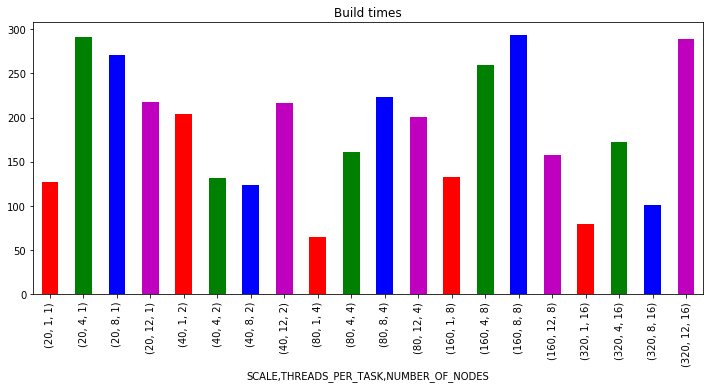

In [17]:
hpc_split_pres['T_bld'].plot(kind='bar', title='Build times',
                             color = ['r', 'g', 'b', 'm']*int(len(hpc_split_pres)/4), figsize=(12,5))

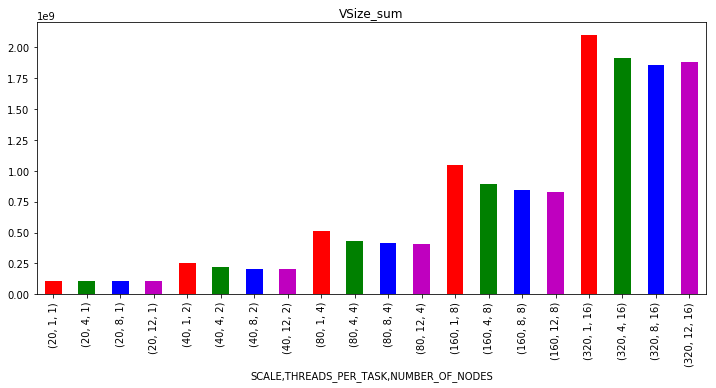

In [18]:
hpc_split_pres['VSize_sum'].plot(kind='bar', title='VSize_sum',
                                 color = ['r', 'g', 'b', 'm']*int(len(hpc_split_pres)/4), figsize=(12,5))

### HPC split - no connect per sec

In [19]:
hpc_split_new_res = pd.concat([pd.read_csv(bench)
                               for bench in glob.glob(hpc_split_new_path)])

In [20]:
hpc_split_new_res['T_bld_xn'] = hpc_split_new_res['T_conns_min'] + hpc_split_new_res['T_ini_max']
hpc_split_new_res['T_bld_nx'] = hpc_split_new_res['T_conns_max'] + hpc_split_new_res['T_ini_min']

hpc_split_new_res['T_bld'] = hpc_split_new_res[['T_bld_xn', 'T_bld_nx']].min(axis=1)

In [21]:
hpc_split_new_pres = pd.pivot_table(hpc_split_new_res, index=['SCALE','THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                                    values=['T_bld', 'VSize_sum', 'N_nrns', 'N_conns_sum'])

hpc_split_new_pres

N_conns_sum   N_nrns   T_bld  \
SCALE THREADS_PER_TASK NUMBER_OF_NODES                                 
20    1                1                 2520451000   225000   94.00   
      4                1                 2520451000   225000  182.06   
      8                1                 2520451000   225000  232.33   
      12               1                 2520451000   225000  259.81   
40    1                2                 5040901000   450000   98.13   
      4                2                 5040901000   450000  186.45   
      8                2                 5040901000   450000  236.76   
      12               2                 5040901000   450000  257.24   
80    1                4                10081801000   900000  101.34   
      4                4                10081801000   900000  190.25   
      8                4                10081801000   900000  249.48   
      12               4                10081801000   900000  279.93   
160   1                8                20163601000  1800000  111.51   
      4                8                20163601000  1800000  208.07   
      8                8                20163601000  1800000  261.81   
      12               8                20163601000  1800000  301.68   
320   1                16               40327201000  3600000  118.89   
      4                16               40327201000  3600000  218.20   
      8                16               40327201000  3600000  302.19   
      12               16               40327201000  3600000  335.13   

                                         VSize_sum  
SCALE THREADS_PER_TASK NUMBER_OF_NODES              
20    1                1                 108664800  
      4                1                 104721696  
      8                1                 102920352  
      12               1                 101874796  
40    1                2                 261021904  
      4                2                 218385904  
      8                2                 207646464  
      12               2                 203856372  
80    1                4                 522257512  
      4                4                 431669128  
      8                4                 420370216  
      12               4                 414098088  
160   1                8                1072494616  
      4                8                 924194200  
      8                8                 864429304  
      12               8                 843947864  
320   1                16               2151668344  
      4                16               1920798200  
      8                16               1889992440  
      12               16               1884720504

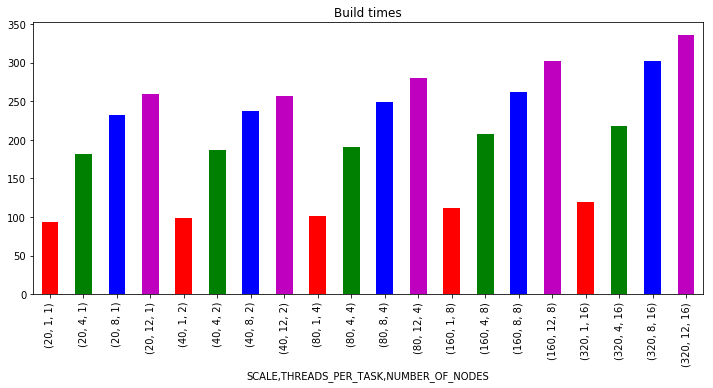

In [22]:
hpc_split_new_pres['T_bld'].plot(kind='bar', title='Build times',
                                 color = ['r', 'g', 'b', 'm']*int(len(hpc_split_new_pres)/4), figsize=(12,5))

# HPC Benchmark - only `one_to_one` calls
Too few connections?

In [ ]:
hpc_one_res = pd.concat([pd.read_csv(bench)
                         for bench in glob.glob(hpc_one_path)])

In [ ]:
print(hpc_one_res)

In [ ]:
hpc_one_res['T_bld'] = hpc_one_res['EE_inner_conn_time'] + hpc_one_res['EI_inner_conn_time'] + hpc_one_res['IE_inner_conn_time'] + hpc_one_res['II_inner_conn_time']

In [ ]:
hpc_one_pres = pd.pivot_table(hpc_one_res, index=['SCALE','THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                              values=['T_bld', 'VSize_sum', 'N_conns_sum', 'EE_conns_per_sec'])
hpc_one_pres

In [ ]:
hpc_one_pres['T_bld'].plot(kind='bar', title='Build times',
                           color = ['r', 'g', 'b', 'm']*int(len(hpc_split_pres)/4), figsize=(12,5))

In [ ]:
hpc_one_pres['EE_conns_per_sec'].plot(kind='bar', title='EE conns per sec',
                                      color = ['r', 'g', 'b']*int(len(hpc_split_pres)/3), figsize=(12,5))

# HBC Benchmark - only `fixed_indegree` calls

In [23]:
hpc_in_res = pd.concat([pd.read_csv(bench)
                        for bench in glob.glob(hpc_in_path)])

In [24]:
print(hpc_in_res)

   NUMBER_OF_NODES  TASKS_PER_NODE  THREADS_PER_TASK  SCALE  PLASTIC RULE  \
0                1               3                 8     20     True   in   
1                2               3                 8     40     True   in   
2                4               3                 8     80     True   in   
3                8               3                 8    160     True   in   
4               16               3                 8    320     True   in   
0                1               2                12     20     True   in   
1                2               2                12     40     True   in   
2                4               2                12     80     True   in   
3                8               2                12    160     True   in   
4               16               2                12    320     True   in   
0                1              24                 1     20     True   in   
1                2              24                 1     40     True   in   

In [25]:
hpc_in_res['T_bld'] = hpc_in_res['EE_inner_conn_time'] + hpc_in_res['EI_inner_conn_time'] + hpc_in_res['IE_inner_conn_time'] + hpc_in_res['II_inner_conn_time']

In [26]:
hpc_in_pres = pd.pivot_table(hpc_in_res, index=['SCALE','THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                             values=['T_bld', 'VSize_sum', 'N_conns_sum', 'EE_conns_per_sec'])
hpc_in_pres

EE_conns_per_sec  N_conns_sum  T_bld  \
SCALE THREADS_PER_TASK NUMBER_OF_NODES                                         
20    1                1                       2759610.0   2025225000  240.0   
      4                1                       5216380.0   2025225000  221.0   
      8                1                       8343630.0   2025225000  211.0   
      12               1                      11856000.0   2025225000  220.0   
40    1                2                       2761870.0   4050450000  149.0   
      4                2                       5254960.0   4050450000  220.0   
      8                2                       8274590.0   4050450000  211.0   
      12               2                      11961000.0   4050450000  189.0   
80    1                4                       2768660.0   8100900000  226.0   
      4                4                       5107830.0   8100900000  149.0   
      8                4                       8421710.0   8100900000   17.0   
      12               4                      12035700.0   8100900000  142.0   
160   1                8                       2761870.0  16201800000  226.0   
      4                8                       5338080.0  16201800000  102.0   
      8                8                       8216680.0  16201800000  200.0   
      12               8                      11688300.0  16201800000  219.0   
320   1                16                      2752850.0  32403600000  245.0   
      4                16                      5094340.0  32403600000  249.0   
      8                16                      8517350.0  32403600000  139.0   
      12               16                     11427800.0  32403600000  235.0   

                                         VSize_sum  
SCALE THREADS_PER_TASK NUMBER_OF_NODES              
20    1                1                  92936160  
      4                1                  84022560  
      8                1                  83173536  
      12               1                  82930792  
40    1                2                 185032912  
      4                2                 168306160  
      8                2                 166457084  
      12               2                 165919216  
80    1                4                 383845480  
      4                4                 337946504  
      8                4                 341260180  
      12               4                 331870884  
160   1                8                 768538648  
      4                8                 716105112  
      8                8                 669168888  
      12               8                 666206032  
320   1                16               1794423928  
      4                16               1361186296  
      8                16               1334681336  
      12               16               1329812856

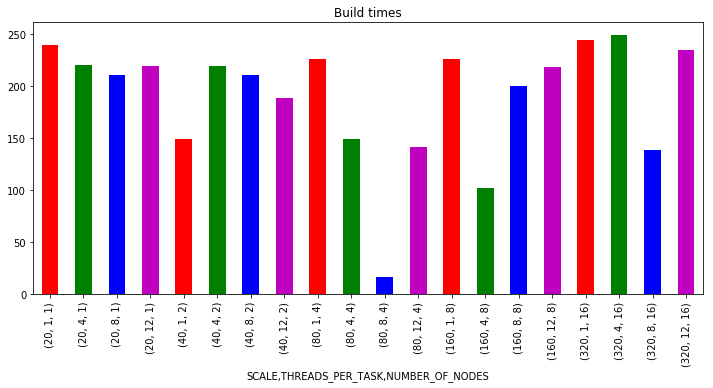

In [27]:
hpc_in_pres['T_bld'].plot(kind='bar', title='Build times',
                          color = ['r', 'g', 'b', 'm']*int(len(hpc_split_pres)/4), figsize=(12,5))

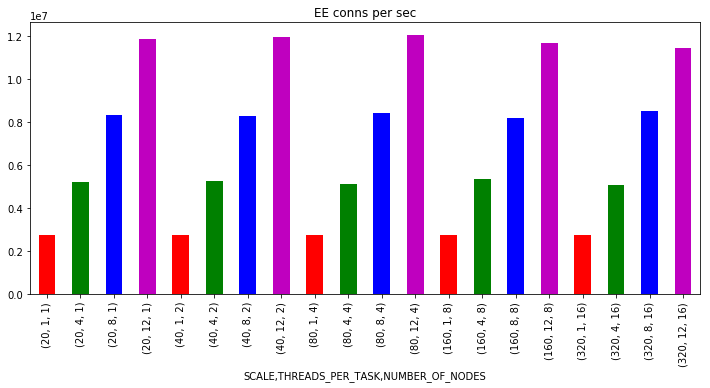

In [28]:
hpc_in_pres['EE_conns_per_sec'].plot(kind='bar', title='EE conns per sec',
                                     color = ['r', 'g', 'b', 'm']*int(len(hpc_split_pres)/4), figsize=(12,5))

### Connections per second for both `one_to_one` and `fixed_indegree`, ex - ex connections:

In [ ]:
hpc_one_in_res = pd.concat([hpc_one_res, hpc_in_res])
hpc_one_in_pres = pd.pivot_table(hpc_one_in_res, index=['RULE','SCALE','THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                                 values=['EE_conns_per_sec'])
hpc_one_in_pres

In [ ]:
hpc_one_in_pres['EE_conns_per_sec'].plot(kind='bar', title='EE conns per sec',
                                         color = ['r', 'g', 'b']*int(len(hpc_split_pres)/3), figsize=(12,5))

# Connections/Second for all `Connect` rules for thread = 4

In [60]:
path_list = [path_string.replace('*', '4') for path_string in
             [hpc_one_path, hpc_all_path, hpc_in_path, hpc_out_path,
              hpc_tot_path, hpc_bern_path]]#, hpc_bern_sym_path]]

connSec_res = pd.concat([pd.read_csv(bench)
                         for bench in path_list])


In [61]:
print(connSec_res)

   NUMBER_OF_NODES  TASKS_PER_NODE  THREADS_PER_TASK  SCALE  PLASTIC  RULE  \
0                1               6                 4     20     True   one   
1                2               6                 4     40     True   one   
2                4               6                 4     80     True   one   
3                8               6                 4    160     True   one   
4               16               6                 4    320     True   one   
0                1               6                 4     20     True   all   
1                2               6                 4     40     True   all   
2                4               6                 4     80     True   all   
3                8               6                 4    160     True   all   
4               16               6                 4    320     True   all   
0                1               6                 4     20     True    in   
1                2               6                 4     40     

In [63]:
connSec_res['T_bld'] = (connSec_res['EE_inner_conn_time'] + connSec_res['EI_inner_conn_time']
                        + connSec_res['IE_inner_conn_time'] + connSec_res['II_inner_conn_time'])

In [65]:
connSec_pres = pd.pivot_table(connSec_res, index=['RULE', 'SCALE', 'NUMBER_OF_NODES'],
                              values=['T_bld', 'VSize_sum', 'N_conns_sum', 'EE_conns_per_sec', 'EI_conns_per_sec'])
connSec_pres

EE_conns_per_sec  EI_conns_per_sec   N_conns_sum  \
RULE SCALE NUMBER_OF_NODES                                                     
all  20    1                       5613310.0         6081080.0  2.025045e+09   
     40    2                       5692370.0         6288430.0  4.050113e+09   
     80    4                       5766150.0         6308410.0  8.100090e+09   
     160   8                       5886250.0         6334060.0  1.620007e+10   
     320   16                      5529950.0         5980070.0  3.240018e+10   
bern 20    1                       2348670.0         2476190.0  2.025213e+09   
     40    2                       1498230.0         1547350.0  4.050402e+09   
     80    4                        868365.0          883570.0  8.100980e+09   
     160   8                        471816.0          478002.0  1.620168e+10   
     320   16                       246388.0          236067.0  3.240382e+10   
in   20    1                       5216380.0         5615640.0  2.025225e+09   
     40    2                       5254960.0         5569310.0  4.050450e+09   
     80    4                       5107830.0         5560130.0  8.100900e+09   
     160   8                       5338080.0         5962900.0  1.620180e+10   
     320   16                      5094340.0         6059250.0  3.240360e+10   
one  20    1                             NaN         3000000.0  1.080000e+06   
     40    2                        750000.0         3000000.0  2.160000e+06   
     80    4                       3000000.0         3000000.0  4.320000e+06   
     160   8                       3000000.0         3000000.0  8.640000e+06   
     320   16                      3000000.0         3000000.0  1.728000e+07   
out  20    1                       1319310.0         1557140.0  2.025225e+09   
     40    2                        794624.0          908473.0  4.050450e+09   
     80    4                        443302.0          506132.0  8.100900e+09   
     160   8                        234807.0          285240.0  1.620180e+10   
     320   16                       121025.0               NaN           NaN   
tot  20    1                             NaN               NaN           NaN   
     40    2                             NaN               NaN           NaN   
     80    4                             NaN               NaN           NaN   
     160   8                             NaN               NaN           NaN   
     320   16                            NaN               NaN           NaN   

                            T_bld     VSize_sum  
RULE SCALE NUMBER_OF_NODES                       
all  20    1                243.0  8.368625e+07  
     40    2                178.0  1.678671e+08  
     80    4                177.0  3.350299e+08  
     160   8                179.0           NaN  
     320   16                40.0  1.340427e+09  
bern 20    1                245.0  8.402256e+07  
     40    2                179.0  1.681833e+08  
     80    4                201.0  3.384483e+08  
     160   8                165.0  7.122037e+08  
     320   16               283.0  1.366429e+09  
in   20    1                221.0  8.402256e+07  
     40    2                220.0  1.683062e+08  
     80    4                149.0  3.379465e+08  
     160   8                102.0  7.161051e+08  
     320   16               249.0  1.361186e+09  
one  20    1                  1.0  4.249048e+06  
     40    2                  6.0  9.576276e+06  
     80    4                  2.0  2.104991e+07  
     160   8                  3.0  5.244388e+07  
     320   16                 4.0  1.228679e+08  
out  20    1                271.0  8.850230e+07  
     40    2                237.0           NaN  
     80    4                268.0           NaN  
     160   8                142.0           NaN  
     320   16                 NaN           NaN  
tot  20    1                  NaN           NaN  
     40    2                  NaN           NaN  
     80    4     

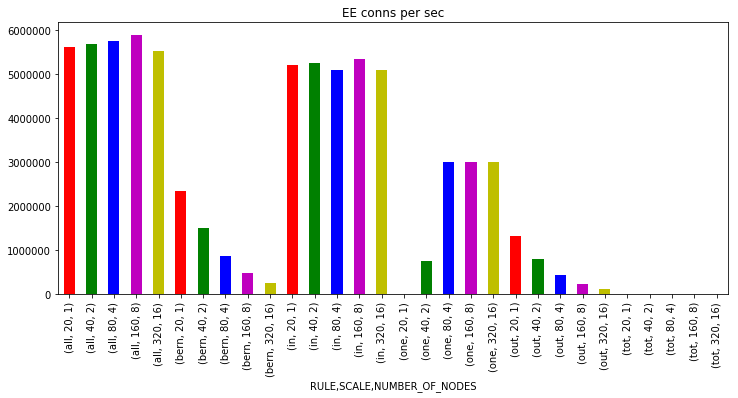

In [66]:
connSec_pres['EE_conns_per_sec'].plot(kind='bar', title='EE conns per sec',
                                      color = ['r', 'g', 'b', 'm', 'y']*int(len(connSec_pres)/5), figsize=(12,5))

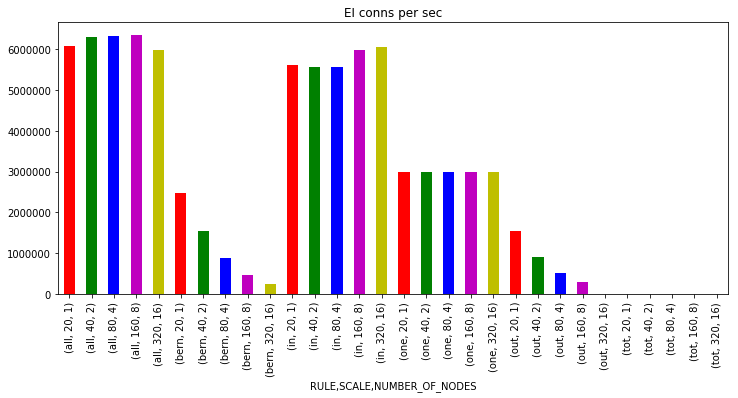

In [68]:
connSec_pres['EI_conns_per_sec'].plot(kind='bar', title='EI conns per sec',
                                      color = ['r', 'g', 'b', 'm', 'y']*int(len(connSec_pres)/5), figsize=(12,5))

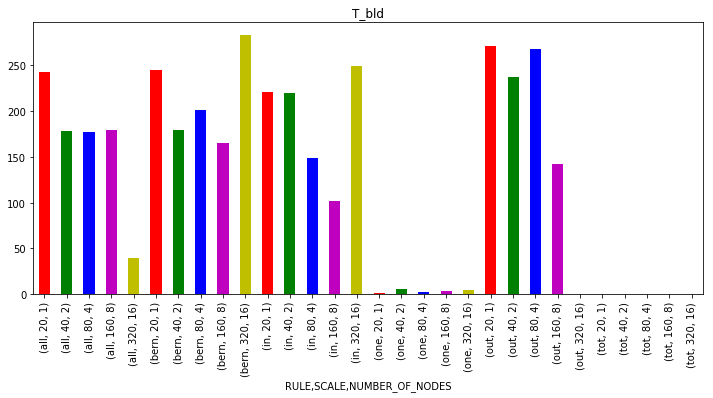

In [71]:
connSec_pres['T_bld'].plot(kind='bar', title='T_bld',
                             color = ['r', 'g', 'b', 'm', 'y']*int(len(connSec_pres)/5), figsize=(12,5))

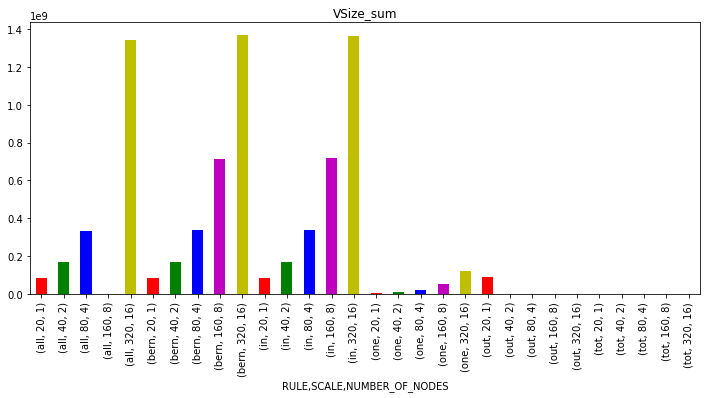

In [72]:
connSec_pres['VSize_sum'].plot(kind='bar', title='VSize_sum',
                               color = ['r', 'g', 'b', 'm', 'y']*int(len(connSec_pres)/5), figsize=(12,5))

# Multi-Area-Model

In [43]:
mam_res = pd.concat([pd.read_csv(bench)
                     for bench in glob.glob(mam_path)])

In [44]:
print(mam_res)

   NUMBER_OF_NODES  TASKS_PER_NODE  NUM_VPS  THREADS_PER_TASK   SCALE  \
0                1               6       24                 4  0.0625   
1                2               6       48                 4  0.1250   
2                4               6       96                 4  0.2500   
3                8               6      192                 4  0.5000   
4               16               6      384                 4  1.0000   
0                1               3       24                 8  0.0625   
1                2               3       48                 8  0.1250   
2                4               3       96                 8  0.2500   
3                8               3      192                 8  0.5000   
4               16               3      384                 8  1.0000   
0                1               2       24                12  0.0625   
1                2               2       48                12  0.1250   
2                4               2       96        

In [45]:
mam_pres = pd.pivot_table(mam_res, index=['SCALE','THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                          values=['T_connect_avg', 'VSize_sum', 'N_conns_sum'])

In [46]:
mam_pres

N_conns_sum  T_connect_avg  \
SCALE  THREADS_PER_TASK NUMBER_OF_NODES                               
0.0625 4                1                   94756223       8.303144   
       8                1                   94756223       9.558792   
       12               1                   94756223      10.672376   
0.1250 4                2                  378005043      14.137301   
       8                2                  378005043      16.970994   
       12               2                  378005043      17.811317   
0.2500 4                4                 1509968177      25.409213   
       8                4                 1509968177      30.562368   
       12               4                 1509968177      32.847020   
0.5000 4                8                 6035755838      48.192471   
       8                8                 6035755838      57.141467   
       12               8                 6035755838      61.521174   
1.0000 4                16               24134776576      90.925531   
       8                16               24134776576     107.590100   
       12               16               24134776576     114.698663   

                                          VSize_sum  
SCALE  THREADS_PER_TASK NUMBER_OF_NODES              
0.0625 4                1                  29724120  
       8                1                  26854488  
       12               1                  25748196  
0.1250 4                2                  70496096  
       8                2                  64343736  
       12               2                  61441836  
0.2500 4                4                 185137768  
       8                4                 174597844  
       12               4                 167763380  
0.5000 4                8                 548592472  
       8                8                 514205756  
       12               8                 474101912  
1.0000 4                16               1781781752  
       8                16               1532650104  
       12               16               1486488184

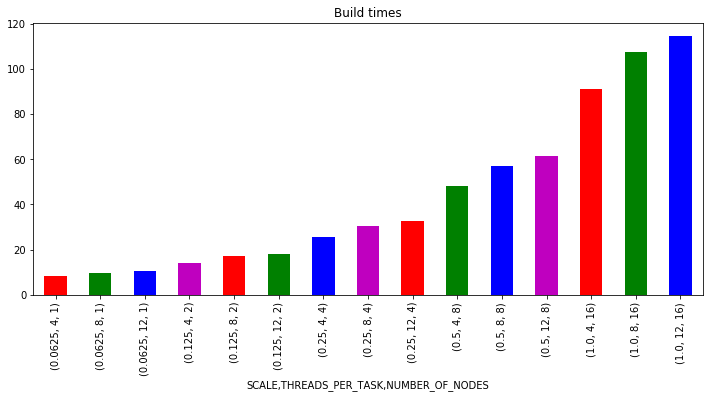

In [47]:
mam_pres['T_connect_avg'].plot(kind='bar', title='Build times',
                               color = ['r', 'g', 'b', 'm']*int(len(hpc_split_pres)/4), figsize=(12,5))

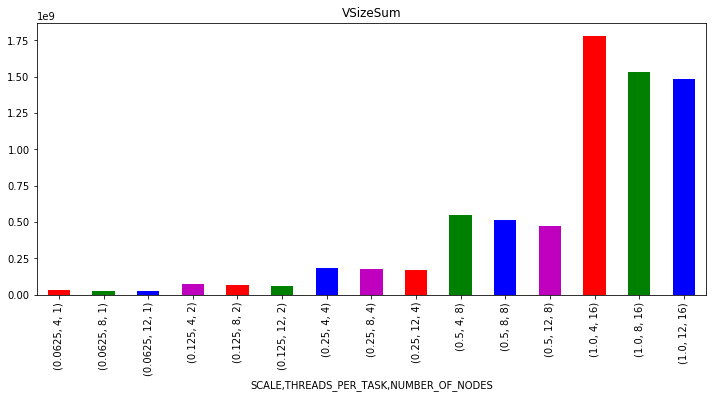

In [48]:
mam_pres['VSize_sum'].plot(kind='bar', title='VSizeSum',
                           color = ['r', 'g', 'b', 'm']*int(len(hpc_split_pres)/4), figsize=(12,5))

# 4x4 mesocircuit

In [35]:
meso_res = pd.concat([pd.read_csv(bench)
                      for bench in glob.glob(mesocircuit_path)])

In [36]:
print(meso_res)

   NUMBER_OF_NODES  TASKS_PER_NODE  THREADS_PER_TASK   SCALE  \
0                1              24                 1  0.0625   
1                2              24                 1  0.1250   
2                4              24                 1  0.2500   
3                8              24                 1  0.5000   
4               16              24                 1  1.0000   
0                1               3                 8  0.0625   
1                2               3                 8  0.1250   
2                4               3                 8  0.2500   
3                8               3                 8  0.5000   
4               16               3                 8  1.0000   
0                1               2                12  0.0625   
1                2               2                12  0.1250   
2                4               2                12  0.2500   
3                8               2                12  0.5000   
4               16               2      

In [37]:
meso_pres = pd.pivot_table(meso_res, index=['SCALE','THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                           values=['T_conns_avg', 'VSize_sum', 'N_conns_sum'])

In [38]:
meso_pres

N_conns_sum  T_conns_avg  VSize_sum
SCALE  THREADS_PER_TASK NUMBER_OF_NODES                                     
0.0625 1                1                  345513663   147.686667   40128480
       4                1                  345513663   222.121667   23614752
       8                1                  345513663   276.153333   21930984
       12               1                  345513663   275.895000   21403204
0.1250 1                2                  690961118   156.176042   70312296
       4                2                  690961118   235.279167   49554928
       8                2                  690961118   282.273333   44443016
       12               2                  690961118   273.705000   43437476
0.2500 1                4                 1382076915   192.519063  156659176
       4                4                 1382076915   316.797083  105088904
       8                4                 1382076915   343.160000   91407432
       12               4                 1382076915   341.207500   91423736
0.5000 1                8                 2764017366   279.417812  314313496
       4                8                 2764017366   453.051458  199482776
       8                8                 2764017366   506.747917  197921848
       12               8                 2764017366   482.738125  186905064
1.0000 1                16                5527838034   457.390573  710875768
       4                16                5527838034   691.948125  450616824
       8                16                5527838034   781.359583  414584568
       12               16                5527838034   765.175938  410852724

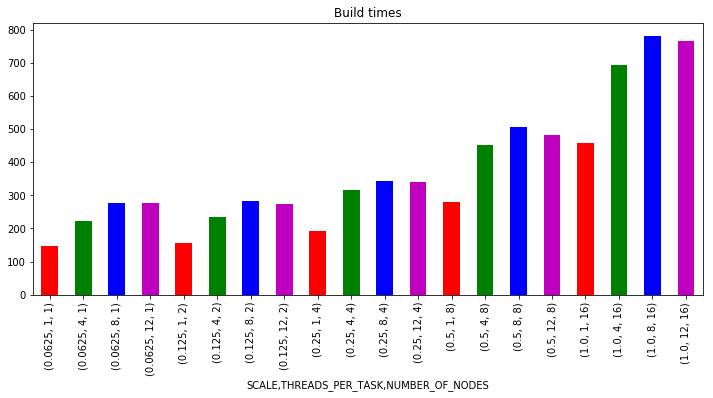

In [41]:
meso_pres['T_conns_avg'].plot(kind='bar', title='Build times',
                              color = ['r', 'g', 'b', 'm']*int(len(hpc_split_pres)/4), figsize=(12,5))

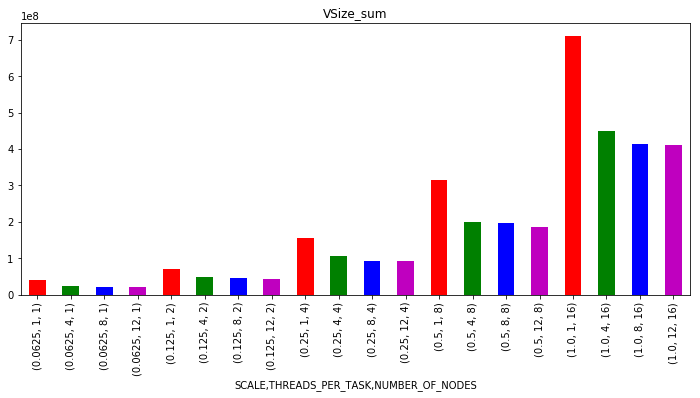

In [42]:
meso_pres['VSize_sum'].plot(kind='bar', title='VSize_sum',
                            color = ['r', 'g', 'b', 'm']*int(len(hpc_split_pres)/4), figsize=(12,5))